<a href="https://colab.research.google.com/github/areprahmannn/Pra-Bootcamp-AI/blob/main/Fixed_Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

## Menggunakan Simple Linear Regression dan Salary Dataset

## 1.   Data Preparation

### Import Library yang dibutuhkan terlebih dahulu

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load Data

In [ ]:
df = pd.read_csv('Salary.csv')

### Menampilkan Beberapa Data

In [ ]:
# df.head() Untuk Menampilkan 5 Data Teratas
df.head()

,YearsExperience,Salary
0,0.7,35010.0
1,1.2,37120.0
2,1.0,29033.0
3,1.5,40510.0
4,2.1,45200.0


In [ ]:
# df.tail() Untuk Menampilkan 5 Data Terbawah
df.tail()

,YearsExperience,Salary
85,1.7,40210.0
86,12.9,141991.0
87,10.6,118200.0
88,8.4,97220.0
89,19.8,212933.0


### Menampilkan Dimensi Data

In [ ]:
df.shape

(90, 2)

### Menampilkan Informasi Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  89 non-null     float64
 1   Salary           89 non-null     float64
dtypes: float64(2)
memory usage: 1.5 KB


### Menampilkan Deskripsi Data

In [ ]:
df.describe()

,YearsExperience,Salary
count,89.000000,89.000000
mean,10.157303,132517.056180
std,5.531129,75526.197181
min,0.700000,29033.000000
25%,5.300000,72120.000000
50%,10.000000,120900.000000
75%,14.600000,182900.000000
max,19.900000,518900.000000


In [ ]:
# Menampilkan Kolom
df.dtypes

,0
YearsExperience,float64
Salary,float64


In [ ]:
# Menampilkan Nama Kolom
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

### Menganalisis Data Yang Hilang

In [ ]:
df.isnull().sum()

,0
YearsExperience,1
Salary,1


### Menghapus Data Yang Hilang

In [ ]:
df.dropna(inplace=True)

In [ ]:
# Setelah data Dihapus
df.isnull().sum()

,0
YearsExperience,0
Salary,0


### Menganalisis Data Yang Duplikat

In [ ]:
df.duplicated().sum()

np.int64(2)

In [ ]:
# Untuk Menghapus Data yang Duplikat Bisa Menngunakan Kode
df = df.drop_duplicates()

In [ ]:
# Data yang duplikat setelah di hapus
df.duplicated().sum()

np.int64(0)

## 2. Exploratory Data Analysis

### Histogram

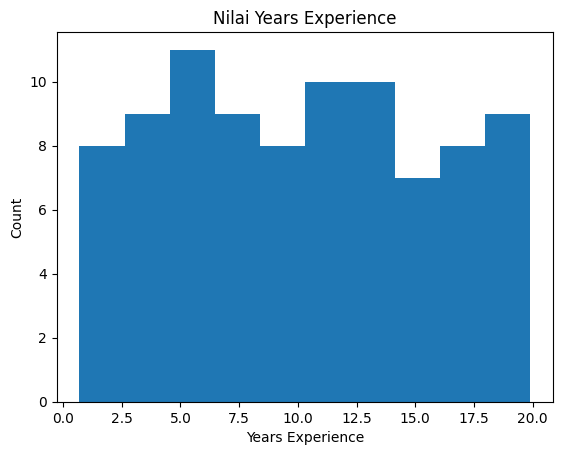

In [ ]:
plt.hist(df["YearsExperience"], bins=10)
plt.xlabel("Years Experience")
plt.ylabel("Count")
plt.title("Nilai Years Experience")
plt.show()

### Hisplot

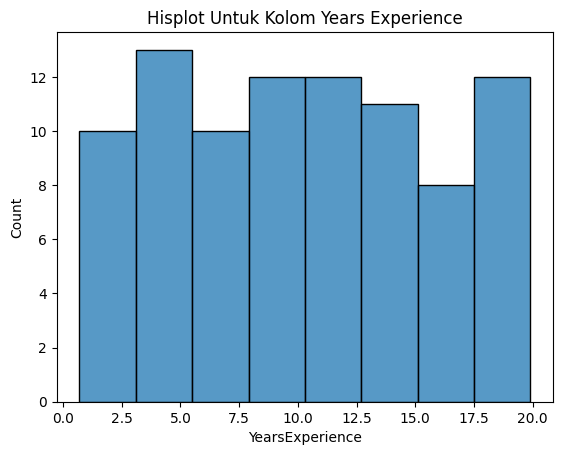

In [ ]:
# Hisplot ini digunakan untuk menghitung frekuensi kemunculan data di setiap interval tersebut

sns.histplot(df["YearsExperience"])
plt.title("Hisplot Untuk Kolom Years Experience")
plt.show()

### Scatter Plot

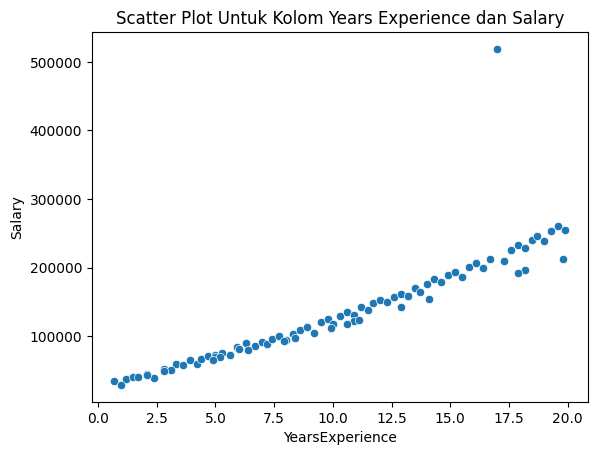

In [ ]:
#Scatter plot digunakan untuk memvisualisasikan hubungan atau pola antara dua variabel numerik.

sns.scatterplot(data=df, x='YearsExperience', y='Salary')
plt.title("Scatter Plot Untuk Kolom Years Experience dan Salary")
plt.show()

### Pairplot

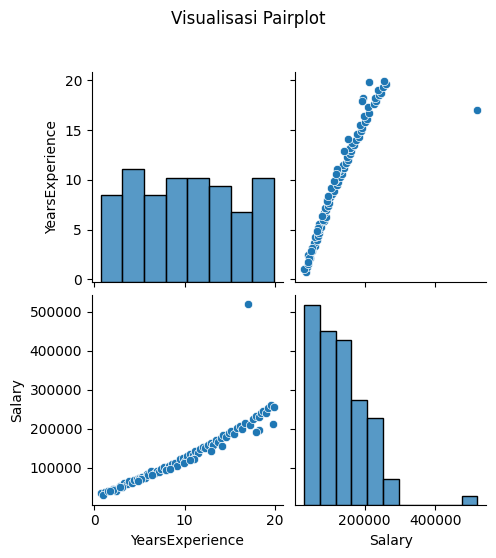

In [ ]:
# Pairplot berguna untuk membuat visualisasi hubungan antara pasangan-pasangan variabel dalam sebuah dataset.

g = sns.pairplot(df, vars=['YearsExperience', 'Salary'])
g.fig.suptitle("Visualisasi Pairplot", y=1.1)
plt.show()

### Menganalisis Outlier Dengan Boxplot

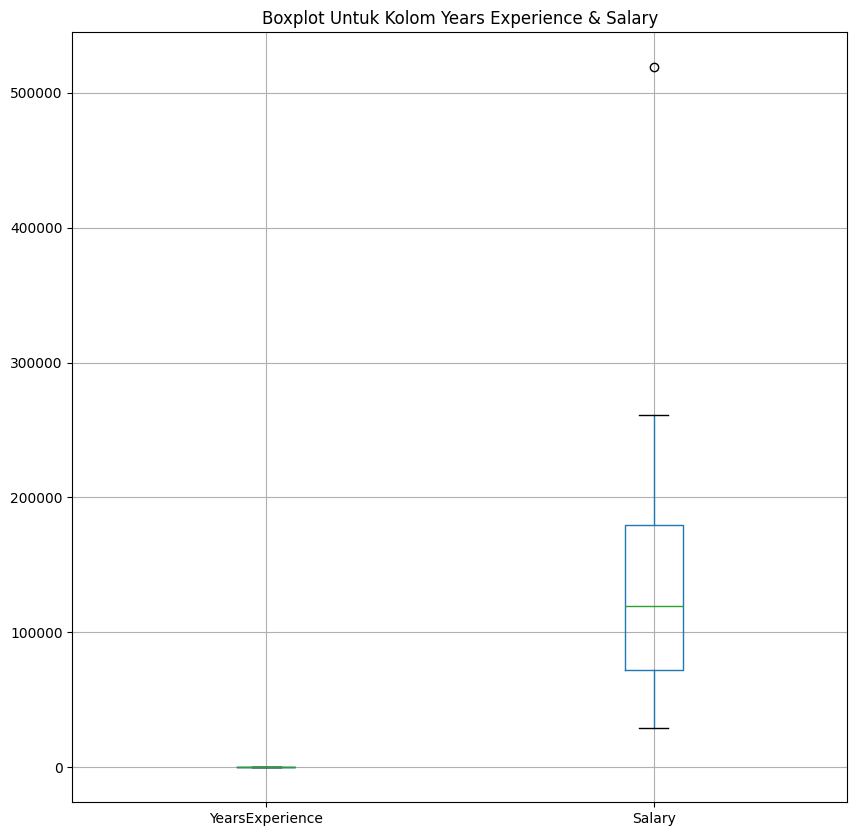

In [ ]:
# Menampilkan Beberapa Kolom

plt.figure(figsize=[10,10])
df.boxplot(column=['YearsExperience', 'Salary'])
plt.title("Boxplot Untuk Kolom Years Experience & Salary")
plt.show()

<Axes: >

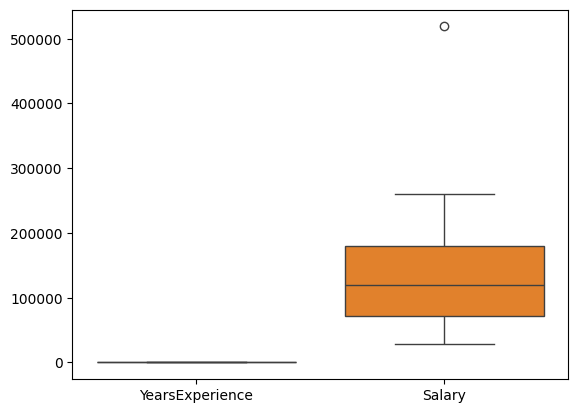

In [ ]:
# Menampilkan Seluruh Kolom

sns.boxplot(df)

### Menghitung Jumlah Outlier


In [ ]:
# Menentukan Kuartil atas dan bawah
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)

# Menghitung Interquartile Range
IQR = Q3 - Q1

# Menghitung Batas Atas Dan Bawah
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

# Menghitung Jumlah Outlier Pada Kolom Salary
outlier = ((df['Salary'] < batas_bawah) | (df['Salary'] > batas_atas)).sum()
print("Outlier Pada Kolom Salary Berjumlah:", outlier)

Outlier Pada Kolom Salary Berjumlah: 1


Menampilkan Nilai Yang Termasuk ke Dalam Outlier

In [ ]:
outliers = df[(df['Salary'] < batas_bawah) | (df['Salary'] > batas_atas)]
outliers

,YearsExperience,Salary
59,17.0,400000.0


### Menangani Outlier

* Menangani Outlier Dengan Membatasi Nilai Dengan Clip

In [ ]:
df['Salary'] = df['Salary'].clip(0, 300000)

<Axes: >

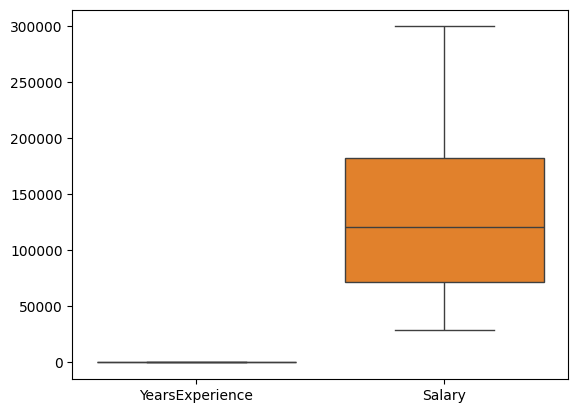

In [ ]:
# Hasil Setelah Outlier Ditangani
sns.boxplot(df)

### Menangani Outlier Berbasis Z-Score

In [ ]:
#Menghitung z-score
z_score = (df['Salary'] - df['Salary'].mean()) / df['Salary'].std()

#Menghitung outlier dengan threshold 3
outlier = (np.abs(z_score) > 3)

#Menampilkan jumlah outlier di kolom Salary
print("Jumlah Outlier Di Kolom Salary:", outlier.sum())
print("="*35)

#Menampilkan niali yang termasuk outlier
df_outlier = df [outlier]
print(df_outlier)

Jumlah Outlier Di Kolom Salary: 0
Empty DataFrame
Columns: [YearsExperience, Salary]
Index: []


### Menghitung Korelasi Data

In [ ]:
# 1. Metode Kendall
corr_kendall = df.corr(method='kendall')
corr_kendall

,YearsExperience,Salary
YearsExperience,1.000000,0.939161
Salary,0.939161,1.000000


In [ ]:
# 2. Metode Spearman
corr_spearman = df.corr(method='spearman')
corr_spearman

,YearsExperience,Salary
YearsExperience,1.000000,0.992546
Salary,0.992546,1.000000


In [ ]:
# 3. Metode Pearson
corr_pearson = df.corr(method='pearson')
corr_pearson

,YearsExperience,Salary
YearsExperience,1.000000,0.977607
Salary,0.977607,1.000000


### Visualisasi Heatmap

<Axes: >

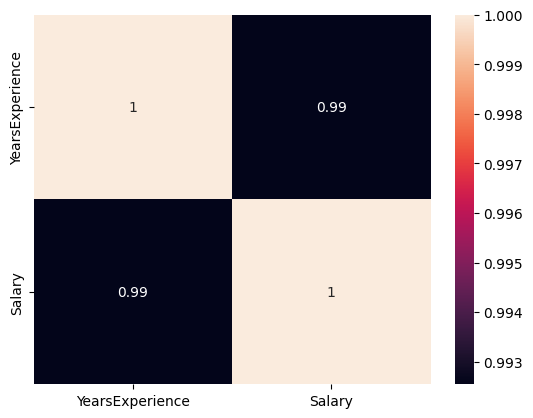

In [ ]:
# Disini Saya Menggunakan Spearman Method

sns.heatmap(corr_spearman, annot=True)

## 3. Modelling

### Menentukan Independet (Fitur) & Dependent (Target)

In [ ]:
# Menentukan Secara Langsung
X = df['YearsExperience']
y = df['Salary']

### Split Data Training & Testing

In [ ]:
dfTrain = df.sample(frac=0.8, random_state=42)
dfTest = df.drop(dfTrain.index)

In [ ]:
# Memunculkan dfTrain
dfTrain.head()

,YearsExperience,Salary
79,3.1,51200.0
0,0.7,35010.0
74,5.2,69533.0
22,7.0,91522.0
12,4.4,67532.0


In [ ]:
# Memunculkan dfTest
dfTest.head()

,YearsExperience,Salary
1,1.2,37120.0
2,1.0,29033.0
14,5.0,72120.0
20,6.3,90210.0
21,6.7,86031.0


In [ ]:
# Menghitung Panjang dfTrain dan dfTest
len(dfTrain), len(dfTest)

(69, 17)

### OLS Statistik

In [ ]:
# Memasukkan Independent dan Dependent Variable Terlebih Dahulu
x_train = dfTrain['YearsExperience']
y_train = dfTrain['Salary']

x_test = dfTest['YearsExperience']
y_test = dfTest['Salary']

In [ ]:
# Mencari Slope / Koefisien
slope = (len(X) * np.sum(X * y) - np.sum(X) * np.sum(y)) / (len(X) * np.sum(X**2) - np.sum(X)**2)
round(slope, 2)

np.float64(11635.05)

In [ ]:
# Mencari Intercept / Bias
intercept = (np.sum(y) - slope * np.sum(X)) / len(X)
round(intercept, 2)

np.float64(12082.1)

In [ ]:
# Mencari Prediksi
y_pred = slope * x_test + intercept
y_pred

,YearsExperience
1,26044.165742
2,23717.154943
14,70257.370920
20,85382.941113
21,90036.962710
23,95854.489707
30,115634.081498
38,142394.705684
53,188934.921661
54,192425.437859


## 4. Evaluasi Model Regression

### R-Squared

In [ ]:
r2Test = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - np.mean(y_test))**2))
print("Hasil Akhir adalah", r2Test)

r2Train = 1 - (np.sum((y_train - slope * x_train - intercept)**2) / np.sum((y_train - np.mean(y_train))**2))
print("Hasil Akhir adalah", r2Train)

Hasil Akhir adalah 0.9749798727513482
Hasil Akhir adalah 0.9506025069697552


### MSE (Mean Squared Error)
### MAE (Mean Absolute Error)
### RMSE (Root Mean Squared Error)

In [ ]:
# MSE (Mean Squared Error)
MSE = np.mean((y_test - y_pred)**2)
print("MSE Test :", MSE)

# MAE (Mean Absolute Error)
MAE = np.mean(np.abs(y_test - y_pred))
print("MAE Test :", MAE)

# RMSE (Root Mean Squared Error)
RMSE = np.sqrt(np.mean((y_test - y_pred)**2))
print("RMSE Test :", RMSE)

print("\n")

MSE = np.mean((y_train - slope * x_train - intercept)**2)
print("MSE Train :", MSE)

MAE = np.mean(np.abs(y_train - slope * x_train - intercept))
print("MAE Train :", MAE)

RMSE = np.sqrt(np.mean((y_train - slope * x_train - intercept)**2))
print("RMSE Train :", RMSE)

MSE Test : 116085944.84281173
MAE Test : 8378.703688839523
RMSE Test : 10774.318764674254


MSE Train : 212413707.2228275
MAE Train : 8410.626683257547
RMSE Train : 14574.419618730191


### Visualisasi Grafik Prediksi

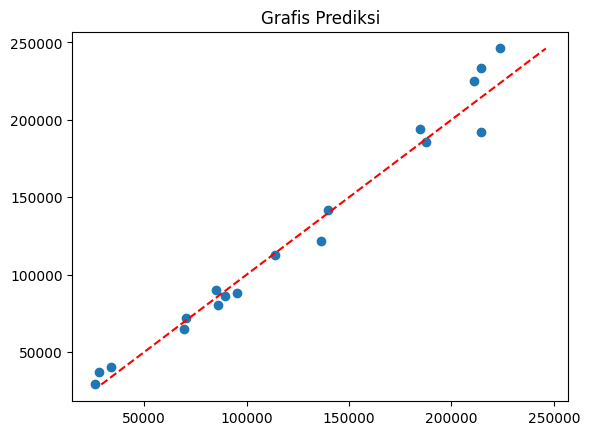

In [ ]:
plt.scatter(y_pred, y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Grafis Prediksi')
plt.show()